#  INFO6105_ASSIGNMENT 4 

**Data set: Credit Card Classification**
 
**Author: Jatin Madan**

**NUID: 002727159**











![](https://drive.google.com/uc?id=1FTscF-OfL7UEiyGpeLpiIxjczxp65oDN)

# Q.1 WHAT IS THE PROBLEM?

**PROBLEM STATEMENT**

In this assignement, I had to perform combine Data Cleaning, Feature Selection and Model Interpretability to predict whether to issue a credit card to the applicant or not based on the background information such as their years of employment, total income and many more.

**Credit Card classification**

* Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

* They would certainly like it if someone could foresee who can more likely to get approve the credit card request by identifying 'low risk' and 'high risk' credit users. We say a user is 'high risk' if during any month they are late on payments by 30 days or more, and 'low risk' otherwise. This is the target we will try to predict later knowing their background details such as Years of Employment, Type of Income, Family Status, etc.

* Dataset consists of 9709 customers and there are nearly 20 features.

# Q2. WHAT DID YOU DO?

Based on the problem statement, it says that the target value is something which predicts whether to issue a credit card to the applicant or not based on the background information such as their years of employment, total income and many more. So, firstly I started with quickly analyzing the data by checking for null values, data type, and description and then cleaning the dataset with the help of the outliers. Then the categorical data were numerically translated using the encoding technique for modeling. Then moving on, I showed the density curves and feature selection using P-static and F-static scores based on which I calculated and got to know the independent variables which are useful to predict a target. After that, I interpreted the nodes from the random forest and calculated the accuracy of the data. The dataset was then divided into two parts: training and testing. We trained the model using a linear regression model on the training dataset and tested its accuracy and model performance on the testing dataset. Later, using H2O AutoML to train a model that will help us predict and also help in telling which model makes the most sense. Lastly, I used SHAP Analysis to increase transparency and interpretability of machine learning models. 

# IMPORTING LIBRARIES

In [1]:
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import io
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Loading the dataset
from google.colab import files
df = pd.read_csv("/content/clean_data.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


# DATA TYPES

In [4]:
df.shape

(9709, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In this Data set there are 2 datatypes 

Numeric datatypes: 
 1.   ID
 2.   Gender
 3.   Own_car 
 4.   Own_property 
 5.   Work_phone
 6.   Phone 
 7.   Email 
 8.   Unemployed
 9.   Num_children
 10.  Num_family
 11.  Account_length
 12.  Total_income
 13.  Age 
 14.  Years_employed
 15.  Target 

Categorical datatypes: 
1.  Income_type
2.  Education_type
3.  Family_status 
4.  Housing_type  
5.  Occupation_type

 


  

In [6]:
# description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5.008804e+06,5.036955e+06,5.069449e+06,5.112986e+06,5.150479e+06
Gender,9709.0,3.487486e-01,0.476599,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Own_car,9709.0,3.677001e-01,0.482204,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Own_property,9709.0,6.715419e-01,0.469677,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Work_phone,9709.0,2.174271e-01,0.412517,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Phone,9709.0,2.876712e-01,0.452700,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Email,9709.0,8.754764e-02,0.282650,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Unemployed,9709.0,1.746833e-01,0.379716,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Num_children,9709.0,4.228036e-01,0.767019,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01
Num_family,9709.0,2.182614e+00,0.932918,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [7]:
df.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

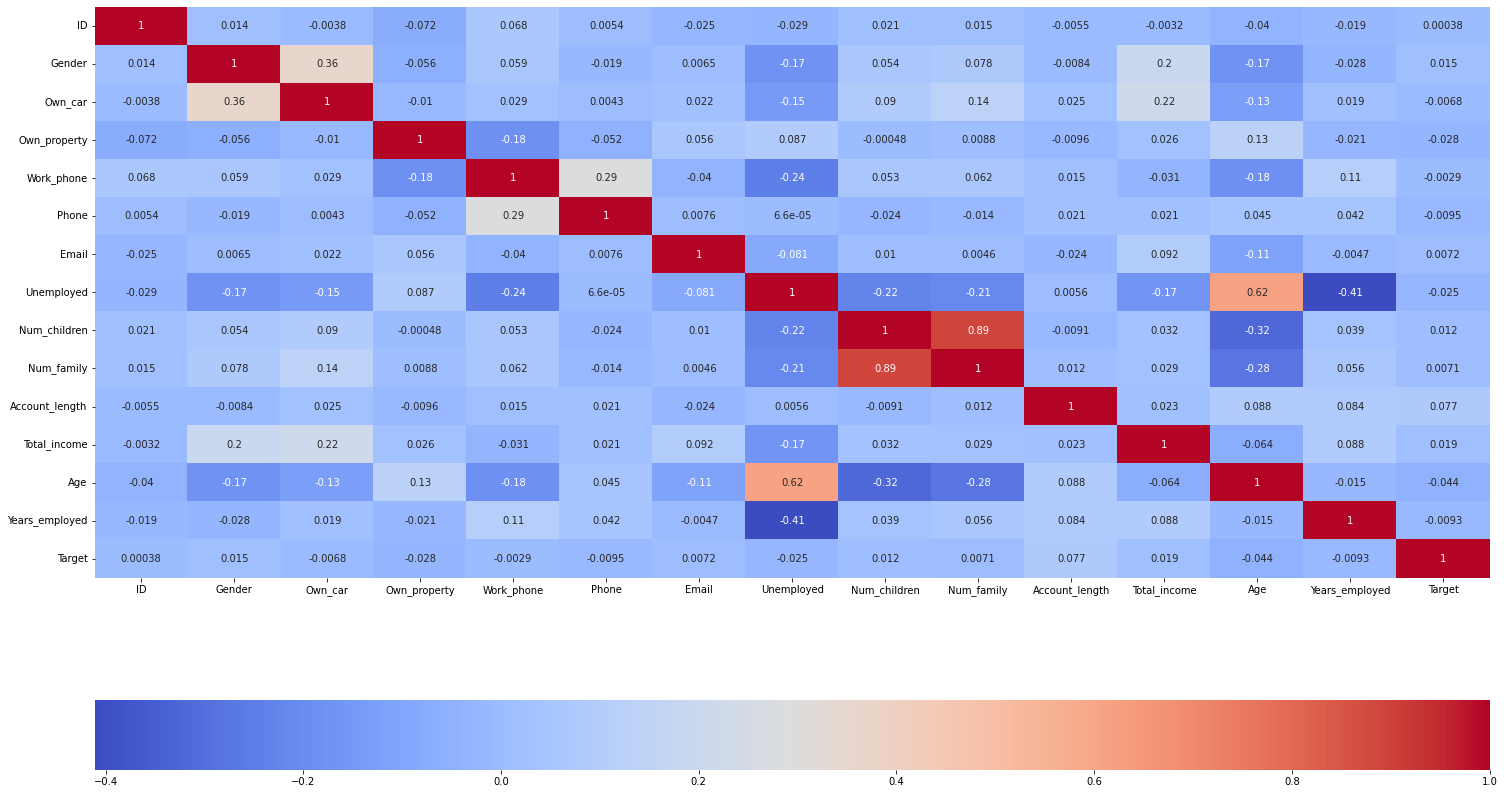

In [8]:
#checking correlation
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,15)) 
sn.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', cbar_kws= {'orientation': 'horizontal'} , fmt='.2g')
plt.show()

# EDA AND FEATURE ENGINEERING 

In [9]:
#Encoding categorical column values
encoder = LabelEncoder()  

df['Income_type'] = encoder.fit_transform(df['Income_type'])   
df['Education_type'] = encoder.fit_transform(df['Education_type'])
df['Family_status'] = encoder.fit_transform(df['Family_status'])
df['Housing_type'] = encoder.fit_transform(df['Housing_type'])
df['Occupation_type'] = encoder.fit_transform(df['Occupation_type'])
df['Gender'] = encoder.fit_transform(df['Gender'])

#Dropping irrelevant columns from the dataset
df = df.drop(columns = ['ID'])

#Converting the datatype from float to int
df["Age"] = df["Age"].astype(int)
df["Total_income"] = df["Total_income"].astype(int)
df["Years_employed"] = df["Years_employed"].astype(int)


df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500,32,12,4,1,0,4,12,1
1,1,1,1,0,0,0,0,0,2,29,112500,58,3,4,4,1,1,17,0
2,0,0,1,0,1,1,0,0,1,4,270000,52,8,0,4,3,1,15,0
3,0,0,1,0,0,0,1,0,1,20,283500,61,0,1,1,2,1,12,0
4,1,1,1,1,1,1,0,0,2,5,270000,46,2,4,1,1,1,0,0


In [10]:
# Standardization of the data
from numpy import asarray
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(df)

# convert the array back to a dataframe
df = DataFrame(data,columns=df.columns)

df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.052632,0.250000,0.258721,0.250000,0.279070,1.00,0.25,0.00,0.8,0.666667,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.483333,0.055233,0.791667,0.069767,1.00,1.00,0.25,0.2,0.944444,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.066667,0.156977,0.666667,0.186047,0.00,1.00,0.75,0.2,0.833333,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.333333,0.165698,0.854167,0.000000,0.25,0.25,0.50,0.2,0.666667,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.052632,0.083333,0.156977,0.541667,0.046512,1.00,0.25,0.25,0.2,0.000000,0.0


# REMOVING OUTLIERS

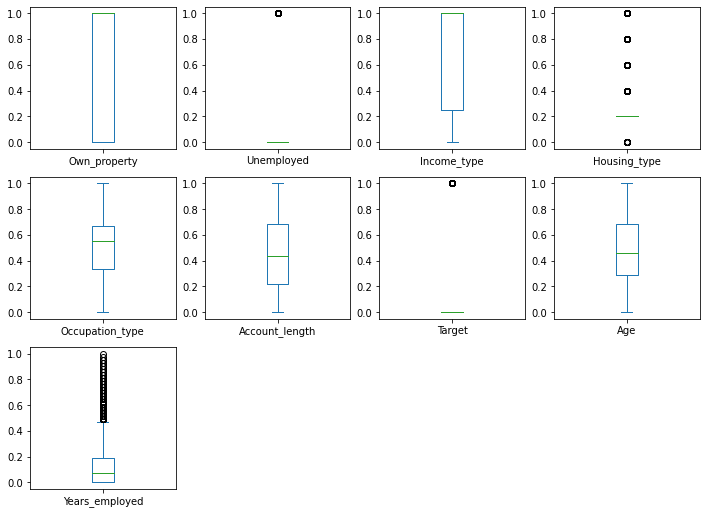

In [11]:
df[['Own_property','Unemployed','Income_type','Housing_type','Occupation_type','Account_length',
  'Target','Age','Years_employed']].plot(kind='box', figsize=(12,12), layout=(4,4),sharex=False, subplots=True);

In [12]:
from numpy.lib.function_base import quantile
quantile(df[['Years_employed']],q = np.arange(0.01,1,0.01))
df[['Years_employed']].quantile(np.arange(0, 1, 0.05))

,Years_employed
0.00,0.000000
0.05,0.000000
0.10,0.000000
0.15,0.000000
0.20,0.000000
0.25,0.000000
0.30,0.023256
0.35,0.023256
0.40,0.046512
0.45,0.069767


In [13]:
#IQR-Inter Quartile Range
Q1 = np.percentile(df['Years_employed'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(df['Years_employed'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Shape Before removing Outliers: ", df.shape)
 

Shape Before removing Outliers:  (9709, 19)


In [14]:
#upper bound
upper_boundary = (Q3+1.5*IQR)
print(upper_boundary)
# Lower bound
lower_boundary = (Q1-1.5*IQR)
print(lower_boundary)

0.46511627906976744
-0.27906976744186046


In [15]:
upper = np.where(df['Years_employed'] >= (+1.5*IQR))
# Lower bound
lower = np.where(df['Years_employed'] <= (Q1-1.5*IQR))

# DENSITY CURVES

Plotting density curves for numeric variables.
A density plot is a smoothed, continuous version of a histogram estimated from the data.


x-axis: Variable 


y-axis: Density (frequency with respect to number of instances)

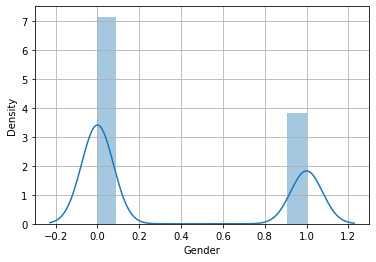

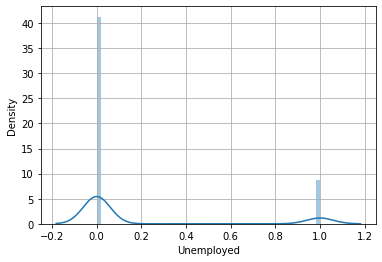

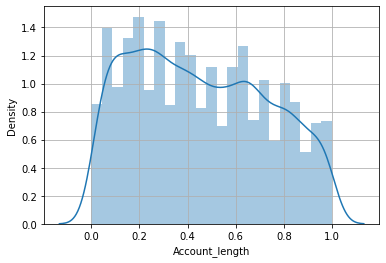

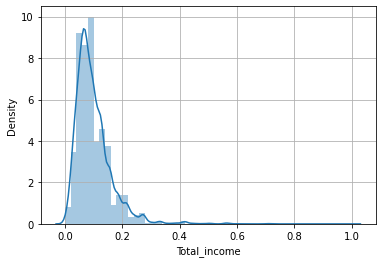

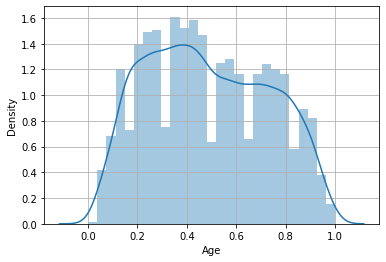

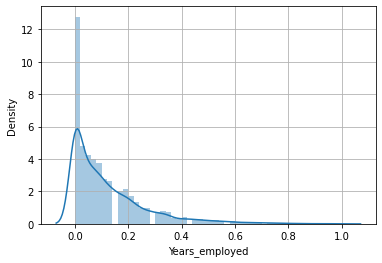

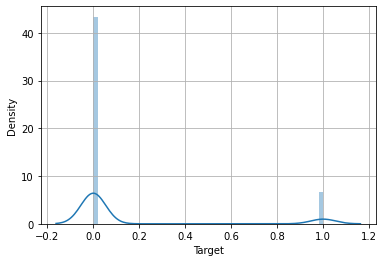

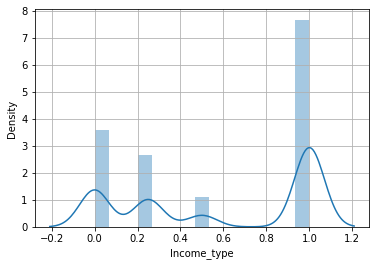

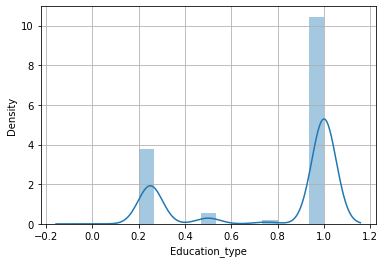

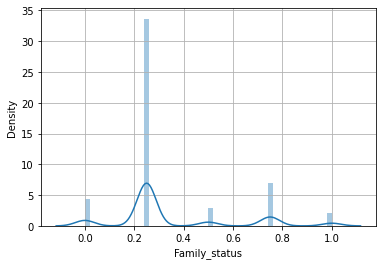

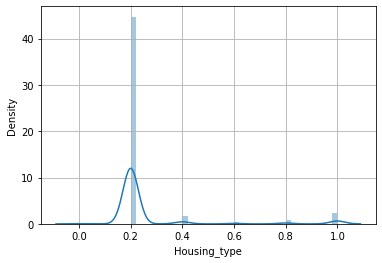

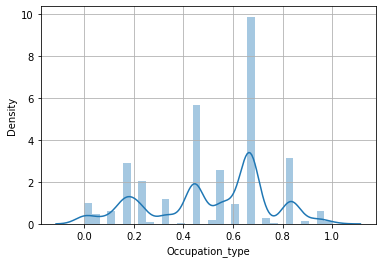

In [16]:
List =['Gender','Unemployed','Account_length','Total_income','Age','Years_employed','Target','Income_type','Education_type','Family_status','Housing_type','Occupation_type']


def distribution(df,list):
  sns.distplot(df[list])
  plt.show()
for i in List:
  plt.grid(True)
  distribution(df,i)
  plt.show()

Using density curves we can visually get an idea of the precentage of samples in different values. 

*Interpretation:(likely to be)*

* Gender: Normal distribution 

* Unemployed: Normal distribution 

* Account_length: Normal distribution 

* Total_income: Normal distribution

* Age: Normal distribution

* Years_employed: Normal distribution 

* Target: Right skewed distribution

* Income_type: Right skewed distribution 

* Education_type: Right skewed distribution 

* Family_status: Multimodal distribution 

* Housing_type: Multimodal distribution 

* Occupation_type: Normal distribution

#  FEATURE SELECTION BASED ON P-STATIC and F-STATIC SCORES

In [17]:
from sklearn.feature_selection import f_regression

column_means = df.mean()
df.fillna(column_means, inplace=True)
X_fs = df.drop(['Target','Income_type','Education_type','Family_status','Housing_type','Occupation_type'], axis = 1)
y_fs = df['Target']

f_val, p_val = f_regression(X_fs, y_fs)

f_regression(X_fs, y_fs)

(array([ 2.19412348,  0.44709461,  7.74048531,  0.08271317,  0.86903924,
         0.50105703,  6.03498823,  1.33241141,  0.48616293, 58.64247459,
         3.42632582, 18.73512629,  1.03920906]),
 array([1.38570454e-01, 5.03733819e-01, 5.41005401e-03, 7.73659871e-01,
        3.51244609e-01, 4.79053035e-01, 1.40424229e-02, 2.48405096e-01,
        4.85660644e-01, 2.07146309e-14, 6.41950584e-02, 1.51695802e-05,
        3.08030900e-01]))

In [18]:
import math

f_val_dict = {}
p_val_dict = {}
for i in range(len(f_val)):
    if math.isnan(f_val[i]):
        f_val[i] = 0.0
    f_val_dict[i] = f_val[i]
    if math.isnan(p_val[i]):
        p_val[i] = 0.0
    p_val_dict[i] = p_val[i]


for idx, col in enumerate(df.columns):
  if idx in f_val_dict:
    print(col, "F-Static is :", f_val_dict[idx], ", P Static is :", p_val_dict[idx])

Gender F-Static is : 2.1941234788829815 , P Static is : 0.13857045412274227
Own_car F-Static is : 0.4470946053241255 , P Static is : 0.5037338189411451
Own_property F-Static is : 7.740485307164524 , P Static is : 0.0054100540101576266
Work_phone F-Static is : 0.08271316920801784 , P Static is : 0.7736598706345794
Phone F-Static is : 0.8690392441092043 , P Static is : 0.35124460915079836
Email F-Static is : 0.5010570316589417 , P Static is : 0.4790530346352194
Unemployed F-Static is : 6.034988232033191 , P Static is : 0.014042422914962749
Num_children F-Static is : 1.3324114057061478 , P Static is : 0.24840509588437096
Num_family F-Static is : 0.4861629277012911 , P Static is : 0.4856606440285104
Account_length F-Static is : 58.642474586269174 , P Static is : 2.0714630879665047e-14
Total_income F-Static is : 3.426325824440986 , P Static is : 0.06419505841362806
Age F-Static is : 18.735126293133366 , P Static is : 1.5169580232697086e-05
Years_employed F-Static is : 1.0392090648474246 , P

# LINEAR REGRESSION 

Linear Regression is a method for discovering the relationship between two variables in the dataset, such as the Total Income of the customer and the Target value which tells whether he/she will be qualified to get a credit card or not.

In [19]:
X = df[['Gender','Own_car','Own_property','Work_phone','Phone','Unemployed','Email','Income_type',
        'Education_type','Family_status','Housing_type','Occupation_type','Num_children','Num_family',
        'Account_length','Target','Age','Years_employed']]

y = df['Total_income']

#spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train,X_t, y_train,y_t= train_test_split(X_t, y_t, test_size=0.15, random_state=1)


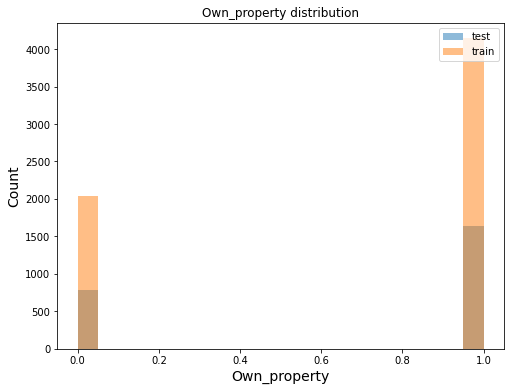

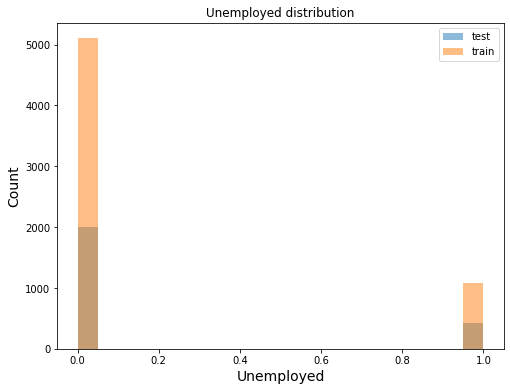

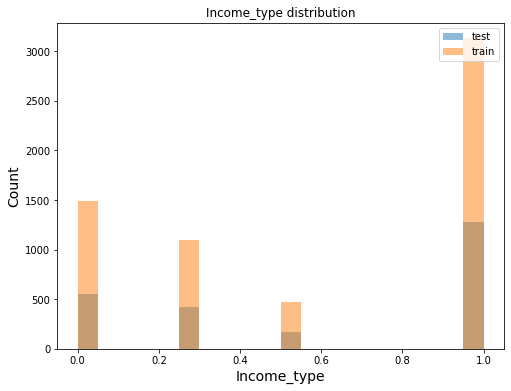

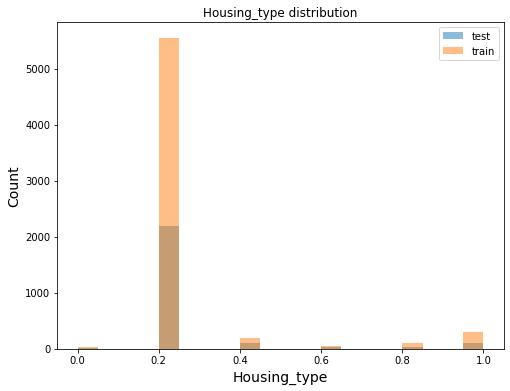

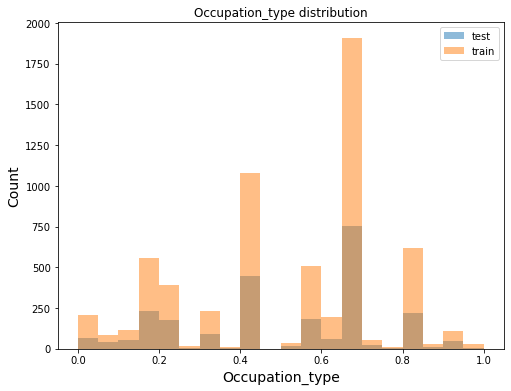

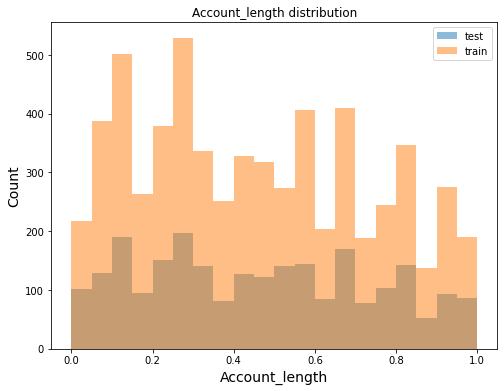

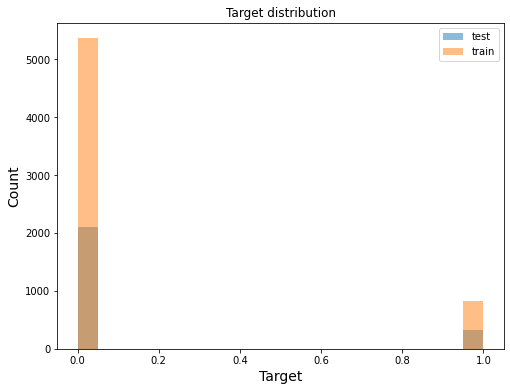

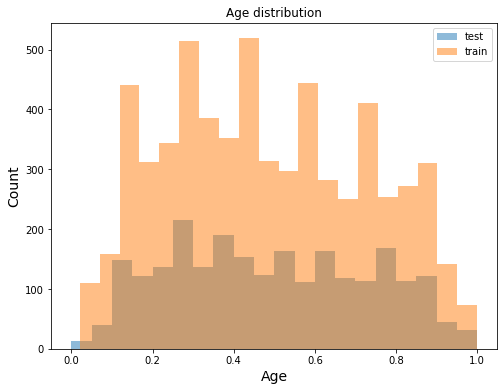

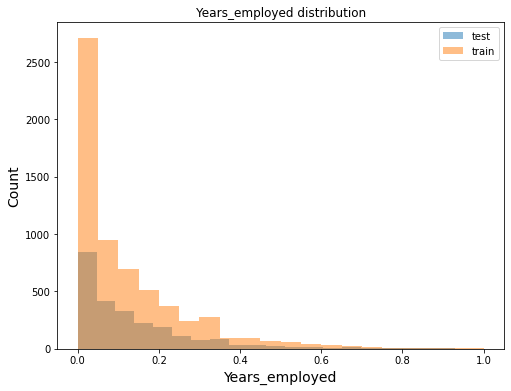

In [20]:
X_test_plot = X_test[['Own_property','Unemployed','Income_type','Housing_type','Occupation_type','Account_length',
                      'Target','Age','Years_employed']]

X_train_plot = X_train[['Own_property','Unemployed','Income_type','Housing_type','Occupation_type','Account_length',
                        'Target','Age','Years_employed']]

# Plotting the data to see the histogram of train and text data 
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [21]:
print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")

The shape of X_train is: (6188, 18)
The shape of X_test is: (2428, 18)


In [22]:
reg = LinearRegression()
model_lor = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [23]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.040676640807978955
Mean Squared Error:  0.0034616083401753225
Root Mean Squared Error:  0.05883543439267974


In [24]:
# Make predictions using the training set
y_pred = reg.predict(X_train)
# The mean squared error
print('Mean squared error %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error 0.00
Coefficient of determination: 0.17
R^2 score on training set = 0.17066693559691437


In [25]:
print(reg.intercept_)

0.11855558813934287


In [26]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1063 ± 0.0121,Unemployed
0.0840 ± 0.0142,Education_type
0.0425 ± 0.0058,Gender
0.0324 ± 0.0073,Income_type
0.0319 ± 0.0131,Own_car
0.0273 ± 0.0071,Age
0.0151 ± 0.0040,Num_children
0.0121 ± 0.0051,Num_family
0.0105 ± 0.0043,Work_phone
0.0064 ± 0.0044,Email


# INTERPRETING THE REGRESSION COEFFICIENTS 

In [27]:
coeff = pd.DataFrame(reg.coef_, X.columns, columns = ['Coefficient'])
coeff

,Coefficient
Gender,0.023757
Own_car,0.017540
Own_property,0.002113
Work_phone,-0.011904
Phone,0.004376
Unemployed,-0.037289
Email,0.016521
Income_type,-0.017111
Education_type,-0.041979
Family_status,-0.004517


Interpreting the coefficients:

For numerical features:

* Holding all other features fixed, a 1 unit increase in 'Target' is associated with an increase of 0.001693.
* Holding all other features fixed, a 1 unit increase in 'Years_employed' is associated with a increase of 0.008346.


# OLS REGRESSION 

In [28]:
var = sm.OLS(df['Total_income'], df[['Own_car','Own_property','Work_phone','Phone','Unemployed','Num_children',
                                     'Num_family','Account_length','Target','Age','Years_employed']]).fit()

var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Total_income   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              1993.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):                        0.00
Time:                        04:53:07   Log-Likelihood:                          12671.
No. Observations:                9709   AIC:                                 -2.532e+04
Df Residuals:                    9698   BIC:                                 -2.524e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Own_car            0.0362      0.001     26.012      0.000       0.033       0.039
Own_property       0.0200      0.001     14.581      0.000       0.017       0.023
Work_phone        -0.0003      0.002     -0.150      0.881      -0.004       0.003
Phone              0.0100      0.002      6.460      0.000       0.007       0.013
Unemployed        -0.0407      0.003    -15.727      0.000      -0.046      -0.036
Num_children      -0.1412      0.036     -3.884      0.000      -0.212      -0.070
Num_family         0.2826      0.028     10.072      0.000       0.228       0.338
Account_length     0.0303      0.002     13.204      0.000       0.026       0.035
Target             0.0111      0.002      5.675      0.000       0.007       0.015
Age                0.0806      0.003     23.939      0.000       0.074       0.087
Years_employed     0.0198      0.005      3.776      0.000       0.010       0.030
==============================================================================
Omnibus:                     4827.080   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63966.719
Skew:                           2.059   Prob(JB):                         0.00
Kurtosis:                      14.881   Cond. No.                         79.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
var.rsquared

0.6933561429578745

* Coefficient of determination also called as R2 score is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.

* From the above dataset, it can be referred that 69% of the changeability of the dependent output attribute can be explained by the model while the remaining 31 % of the variability is still unaccounted for.

* In this dataset Total_income is the target value.

* Significant variables (p-value < 0.05):

1. Own_car	
2. Own_property		
3. Unemployed	
4. Num_children	
5. Num_family	
6. Account_length
7. Target	
8. Age	
9. Years_employed

*  Non-significant Independent variable: (p-value > 0.05):

1.  Work_phone

# RANDOM FOREST

A decision tree is a flowchart-like tree structure in which an internal node represents a feature (or attribute), a branch represents a decision rule, and each leaf node represents the outcome. The root node is the node at the very top of a decision tree. It learns to partition based on the attribute value. It partitions the tree recursively, which is referred to as recursive partitioning. This flowchart-like structure aids in decision making. It's a flowchart diagram that easily mimics human level thinking.

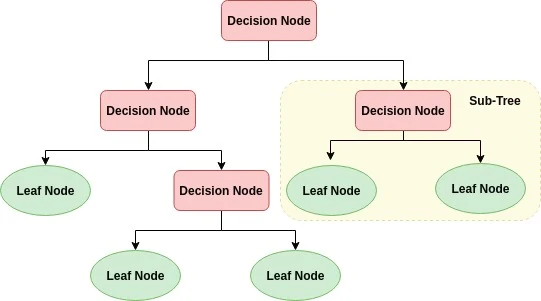

In [30]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)

model_reg = RFregressor.fit(X_train, y_train)

rf_y_pred = RFregressor.predict(X_test)

print("training data score: {:,.3%}".format(RFregressor.score(X_train, y_train)))
print("test data score: {:,.3%}".format(RFregressor.score(X_test, y_test)))

mean_absolute_error(y_test, rf_y_pred)

mean_squared_error(y_test, rf_y_pred)

r2_score(y_test, rf_y_pred)

training data score: 87.659%
test data score: 5.540%


0.05540101703025013

In [31]:
from math import sqrt
print("RMSE of Random Forest Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))


RMSE of Random Forest Model is  0.061208611113130265


# INTERPRETING THE NODES

In [32]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


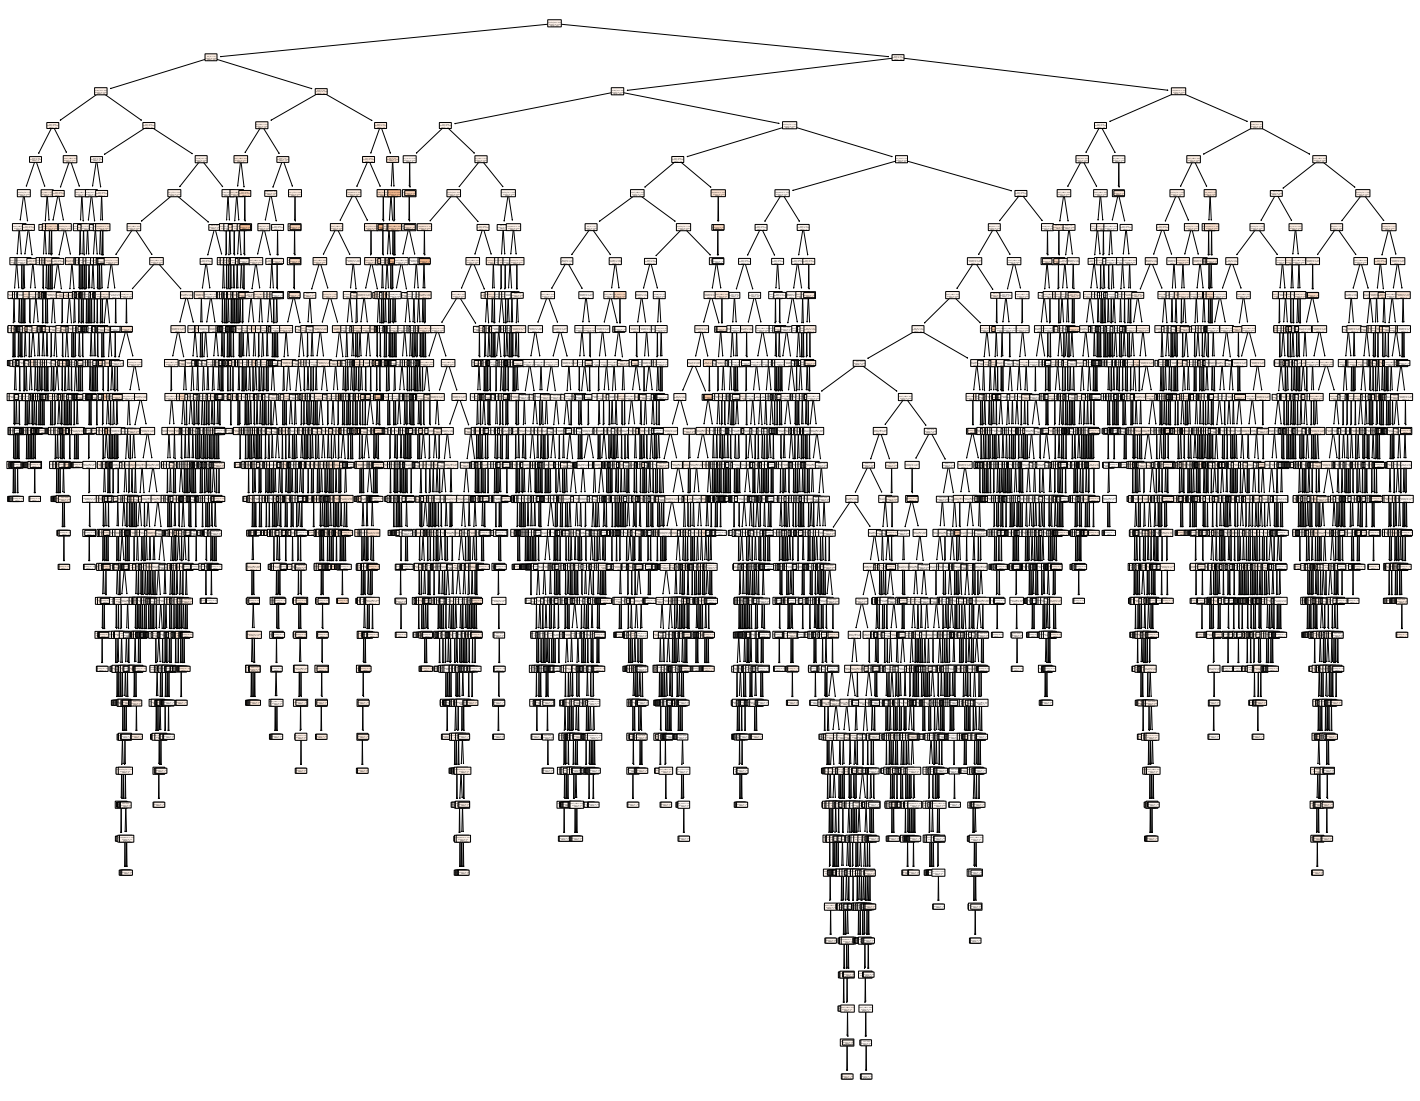

In [33]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25, 20))
plot_tree(RFregressor.estimators_[0],
          feature_names=X.columns,
           
          filled=True, impurity=True, 
          rounded=True)

rfc_tuned_pred = RFregressor.predict(X_test)

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

* Here, since we have not mentioned the number of n_estimators explicitly, therefore the default is taken as 100.

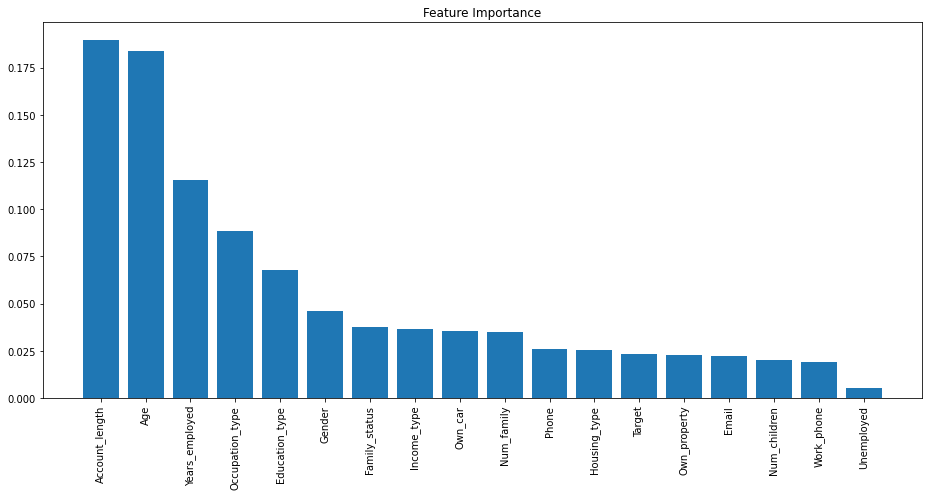

In [34]:
importances = RFregressor.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize = (13,7))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

* It makes sense that the number of months the account has been open for correlates with the riskiness of the customer (since there are more opportunity to miss payments) and that is why Account_length has the highest significance.



# AUTO ML


Implementing AutoML: Automated machine learning, often known as automated ML or AutoML, is the process of automating the laborious, iterative activities associated with developing a machine learning model. It enables model quality to be maintained while ML models are built at high scale, efficiency, and productivity by data scientists, analysts, and developers.


H2O is a distributed in-memory machine learning platform with linear scalability that can be used to implement AutoML. The most popular statistical and machine learning algorithms, such as deep learning, generalized linear models, and gradient boosted machines, are supported by H2O.




In [35]:
# Installing h2o 
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
import re
import matplotlib.pylab as plt
import numpy as np
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpk4f84wb_
  JVM stdout: /tmp/tmpk4f84wb_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpk4f84wb_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_99cev9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [37]:
# loading datset
path = "/content/clean_data.csv"
data_path = pd.read_csv("/content/clean_data.csv")

In [38]:
# Creating a copy of the dataset
df_copy=data_path.copy()

In [39]:
# Replacing the Target binary values into String values to perform Binomial classification
df_copy['Target'] = df_copy['Target'].replace(1, "Y")
df_copy['Target'] = df_copy['Target'].replace(0, "N")

In [40]:
data_path.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [41]:
#Loading the dataset into H2O
data2 = h2o.H2OFrame(df_copy)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [42]:
# description of the dataset
data2.describe()

Rows:9709
Cols:20

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
type,int,int,int,int,int,int,int,int,int,int,int,real,real,real,enum,enum,enum,enum,enum,enum
mins,5008804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27000.0,20.504185575336933,0.0,,,,,,
mean,5076104.679060664,0.3487485837882377,0.36770007209805333,0.671541868369554,0.21742712946750437,0.2876712328767123,0.08754763621382222,0.1746832835513441,0.42280358430322246,2.1826140694201257,27.270058708414904,181228.19456174638,43.784093083598485,5.664730161452851,,,,,,
maxs,5150479.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.0,20.0,60.0,1575000.0,68.86383703977495,43.02073280081042,,,,,,
sigma,40802.696052772466,0.4765987878099639,0.4822039797226454,0.4696765995682179,0.4125167873991112,0.45270034532244624,0.2826504487639636,0.3797155310732071,0.7670189141552809,0.9329181887062356,16.648056893148983,99277.30509737751,11.625767724979015,6.3422412768887755,,,,,,
zeros,0,6323,6139,3189,7598,6916,8859,8013,6819,0,57,0,0,1696,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,5008804.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,15.0,427500.0,32.86857361889703,12.4355736257418,Working,Higher education,Civil marriage,Rented apartment,Other,Y
1,5008806.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,29.0,112500.0,58.79381506807121,3.104786545924968,Working,Secondary / secondary special,Married,House / apartment,Security staff,N
2,5008808.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,270000.0,52.32140290355038,8.353354278321937,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,N


In [43]:
# Splitting data into train test and validation set
data_train2,data_test2,data_valid2 = data2.split_frame(ratios=[.7, .15])

In [44]:
data_train2.head()

ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
5.0088e+06,1,1,1,1,0,0,0,0,2,15,427500,32.8686,12.4356,Working,Higher education,Civil marriage,Rented apartment,Other,Y
5.00881e+06,0,0,1,0,0,0,1,0,1,20,283500,61.5043,0,Pensioner,Higher education,Separated,House / apartment,Other,N
5.00882e+06,1,1,1,1,1,1,0,0,2,5,270000,46.194,2.10545,Working,Higher education,Married,House / apartment,Accountants,N
5.00882e+06,0,1,0,0,0,0,0,0,2,25,130500,29.2107,3.01991,Working,Incomplete higher,Married,House / apartment,Accountants,Y
5.00884e+06,1,0,1,0,0,0,0,1,3,39,405000,32.4223,5.51962,Commercial associate,Higher education,Married,House / apartment,Managers,N
5.00884e+06,1,1,1,0,1,0,0,0,2,43,112500,56.1326,12.1837,Commercial associate,Secondary / secondary special,Married,House / apartment,Drivers,N
5.00885e+06,0,1,1,0,0,0,0,2,4,39,135000,43.1522,8.68738,Working,Secondary / secondary special,Married,House / apartment,Laborers,N
5.00887e+06,0,0,1,0,0,0,0,1,3,24,211500,44.3869,19.4364,State servant,Secondary / secondary special,Civil marriage,House / apartment,Core staff,N
5.00887e+06,1,1,1,0,1,0,0,0,2,10,360000,45.6409,14.6861,Commercial associate,Secondary / secondary special,Married,House / apartment,Security staff,Y
5.00887e+06,0,0,1,0,0,1,0,2,4,21,126000,33.9802,4.85431,Commercial associate,Higher education,Married,House / apartment,Managers,N


In [45]:
y2 = "Total_income"
x2 = data2.columns
x2.remove(y2)
x2

['ID',
 'Gender',
 'Own_car',
 'Own_property',
 'Work_phone',
 'Phone',
 'Email',
 'Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Age',
 'Years_employed',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type',
 'Target']

In [46]:
aml2 = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

In [47]:
aml2.train(x = x2, y = y2, training_frame = data_train2, validation_frame=data_valid2)

AutoML progress: |
04:58:02.732: Project: AutoML_1_20221216_45802
04:58:02.733: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:58:02.744: Setting stopping tolerance adaptively based on the training frame: 0.012199658658326043
04:58:02.744: Build control seed: 10
04:58:02.745: training frame: Frame key: AutoML_1_20221216_45802_training_py_2_sid_9d91    cols: 20    rows: 6719  chunks: 1    size: 229738  checksum: -6736186941673795595
04:58:02.747: validation frame: Frame key: py_4_sid_9d91    cols: 20    rows: 1502  chunks: 1    size: 57348  checksum: -7990699191985355145
04:58:02.747: leaderboard frame: Frame key: py_4_sid_9d91    cols: 20    rows: 1502  chunks: 1    size: 57348  checksum: -7990699191985355145
04:58:02.755: blending frame: NULL
04:58:02.756: response column: Total_income
04:58:02.756: fold column: null
04:58:02.760: weights column: null
04:58:02.895: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,35.0,35.0,19842.0,8.0,15.0,11.8,36.0,44.0,40.228573
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-12-16 04:58:11,0.119 sec,0.0,100728.5571115,69821.3551060,10146242217.7623920,103926.7351573,71640.5975499,10800766280.4612846
,2022-12-16 04:58:12,1.142 sec,5.0,94015.0915673,64818.0701509,8838837442.4023914,98361.0082760,67074.7185308,9674887949.0708370
,2022-12-16 04:58:12,1.754 sec,10.0,90333.8299303,62130.2965913,8160200829.8766747,95930.5348681,65092.6701472,9202667520.0843506
,2022-12-16 04:58:13,2.196 sec,15.0,88389.3225745,60809.0216445,7812672345.1730747,94946.1739524,64187.0487219,9014775948.2030258
,2022-12-16 04:58:13,2.553 sec,20.0,87024.7557515,59792.5547863,7573308113.6072969,94640.3236439,63855.1480764,8956790859.4137230
,2022-12-16 04:58:14,2.930 sec,25.0,86011.0468028,59076.6810049,7397900172.1149511,94593.8912055,63729.7841385,8948004253.4059582
,2022-12-16 04:58:14,3.298 sec,30.0,85152.5830745,58458.7266497,7250962404.2538204,94588.3554988,63790.2468113,8946956995.9669495
,2022-12-16 04:58:14,3.599 sec,35.0,84351.8079553,57890.1556744,7115227505.3345814,94726.8877699,63896.8209497,8973183266.5674801


In [48]:
lb2 = aml2.leaderboard

In [49]:
lb2.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20221216_45802,94726.9,8.97318e+09,63896.8,0.448008,8.97318e+09
GBM_2_AutoML_1_20221216_45802,95622.2,9.14361e+09,63929.9,0.448377,9.14361e+09
XRT_1_AutoML_1_20221216_45802,95948.9,9.20619e+09,65385.1,0.457021,9.20619e+09
GBM_3_AutoML_1_20221216_45802,96288.6,9.2715e+09,64445.1,0.45038,9.2715e+09
GBM_4_AutoML_1_20221216_45802,96386.9,9.29043e+09,65132,0.45406,9.29043e+09
DRF_1_AutoML_1_20221216_45802,96660.5,9.34325e+09,65440.1,0.457053,9.34325e+09
XGBoost_3_AutoML_1_20221216_45802,96834.4,9.3769e+09,65068,0.454247,9.3769e+09
XGBoost_1_AutoML_1_20221216_45802,102895,1.05873e+10,72173.9,0.503658,1.05873e+10
XGBoost_2_AutoML_1_20221216_45802,103190,1.06482e+10,72003.8,0.496847,1.06482e+10
GLM_1_AutoML_1_20221216_45802,103927,1.08008e+10,71640.6,0.500588,1.08008e+10


In [50]:
# finding and storing the best model
best_model2 = h2o.get_model(aml2.leaderboard[0,'model_id'])

In [51]:
# printing the best model
best_model2.algo

'gbm'

In [52]:
data_pred2=aml2.leader.predict(data_test2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [53]:
data_pred2.head()

predict
221890
163687
219239
169553
165992
217376
171780
214990
204161
211992


In [54]:
aml2.leader.model_performance(data_test2)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 6138981519.38472
RMSE: 78351.65294609118
MAE: 57483.89090829483
RMSLE: 0.43142827873859235
Mean Residual Deviance: 6138981519.38472

* The best performing model is **GBM model** which combines the predictions from multiple decision trees to generate the final predictions. 

# SHAP ANALYSIS

SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.

For instance, linear models' coefficients can be used as a measure of the overall significance of each characteristic, but because they are scaled with the scale of the variable, they may result in errors and misunderstandings. Additionally, the feature's local significance and how it varies with lower and higher levels are not taken into account by the coefficient. The same is true of feature importances in tree-based models, and for this reason SHAP is helpful in enhancing model interpretability.

In [55]:
# Installing SHAP 
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### SHAP_LINEAR REGRESSION

In [56]:
# Importing SHAP libraries
import shap

explainer = shap.explainers.Linear(reg,X_train)
shap_values = explainer.shap_values(X_train)

In [57]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

* The figure above shows how each feature contributes to model output by pushing it away from the base value (the average model output throughout the training dataset). Features that have an impact on the forecast are highlighted in red and blue, accordingly.

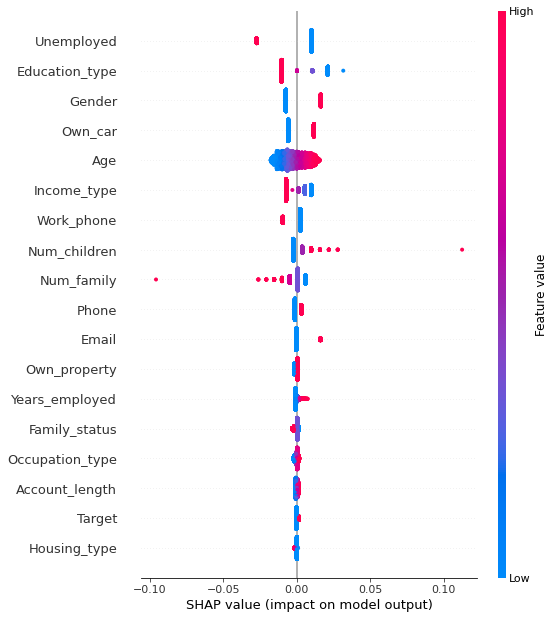

In [58]:
shap.summary_plot(shap_values, X_train)

* To get a better understanding which features are most crucial for a model, we have exhibited the SHAP values of each feature for each sample. The distribution of the impacts that each feature has on the model output is shown in the figure above using SHAP values. The magnitudes of all SHAP values across all samples are added together to rank the features. The color and attribute value are related as red being the highest and blue being the lowest.

* As we can see, the Unemployed is this model's most significant attribute, followed by the education type of the customer.

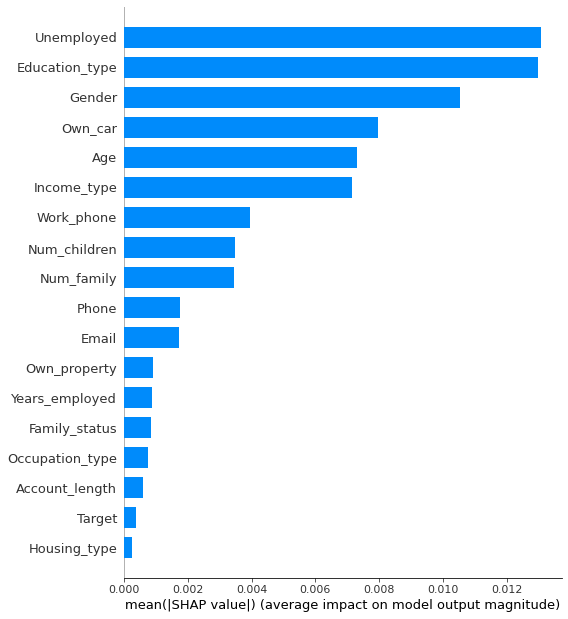

In [59]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

* Simply taking the mean absolute value of the SHAP values for each feature will get the typical bar plot.

### SHAP_RANDOM FOREST

In [60]:
model_rf = RFregressor
regr_rf = model_reg

explainer_rfc = shap.TreeExplainer(regr_rf)
instance = X_train.loc[[72]]

shap_values_rfc = explainer.shap_values(instance)

shap_values_sum = explainer.shap_values(X_train)

In [61]:
shap.initjs()
shap.force_plot(explainer_rfc.expected_value[0], shap_values_rfc[0], instance)

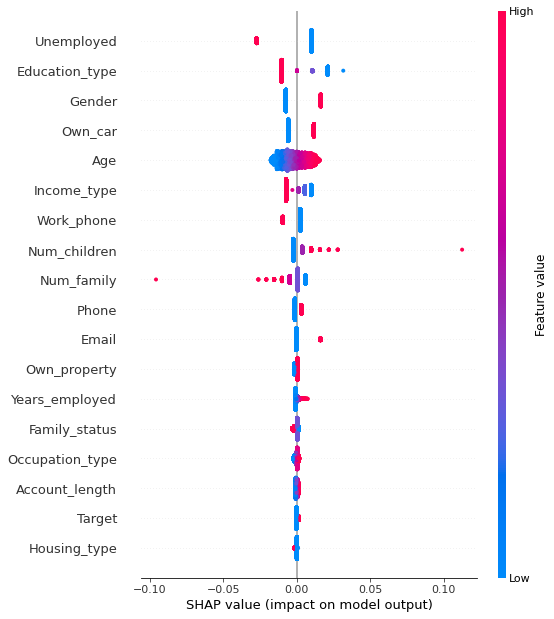

In [62]:
shap.summary_plot(shap_values_sum, X_train)

### SHAP_AUTO ML

In [63]:
from h2o.estimators import H2ORandomForestEstimator

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20221216_45802,58632.9,3.43782e+09,37442.4,0.303989,3.43782e+09,12270,0.132096,DRF
XGBoost_1_AutoML_1_20221216_45802,63982.1,4.09371e+09,41723.6,0.341691,4.09371e+09,5356,0.018527,XGBoost
XRT_1_AutoML_1_20221216_45802,65189.4,4.24966e+09,45272.5,0.346517,4.24966e+09,12052,0.206127,DRF
XGBoost_2_AutoML_1_20221216_45802,66412.4,4.41061e+09,44930.4,0.354277,4.41061e+09,2192,0.016766,XGBoost
GBM_4_AutoML_1_20221216_45802,72708.8,5.28657e+09,49988.8,0.372938,5.28657e+09,2318,0.063038,GBM
GBM_3_AutoML_1_20221216_45802,77036.6,5.93464e+09,53608.4,0.393251,5.93464e+09,1369,0.05088,GBM
GBM_2_AutoML_1_20221216_45802,79006.3,6.24199e+09,55175.5,0.403009,6.24199e+09,1819,0.043041,GBM
XGBoost_3_AutoML_1_20221216_45802,79600.3,6.3362e+09,56169.2,0.406287,6.3362e+09,1062,0.017603,XGBoost
GBM_1_AutoML_1_20221216_45802,85164.8,7.25304e+09,58757.1,0.421194,7.25304e+09,3530,0.027089,GBM
GLM_1_AutoML_1_20221216_45802,99274.5,9.85542e+09,69401.9,0.499164,9.85542e+09,1188,0.005322,GLM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

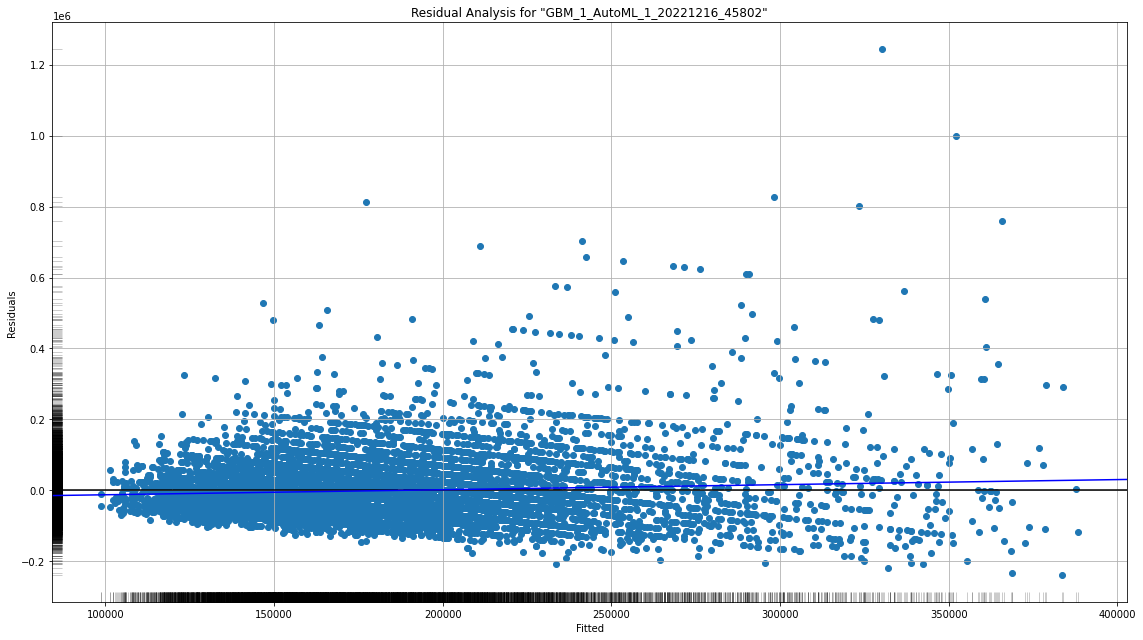

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

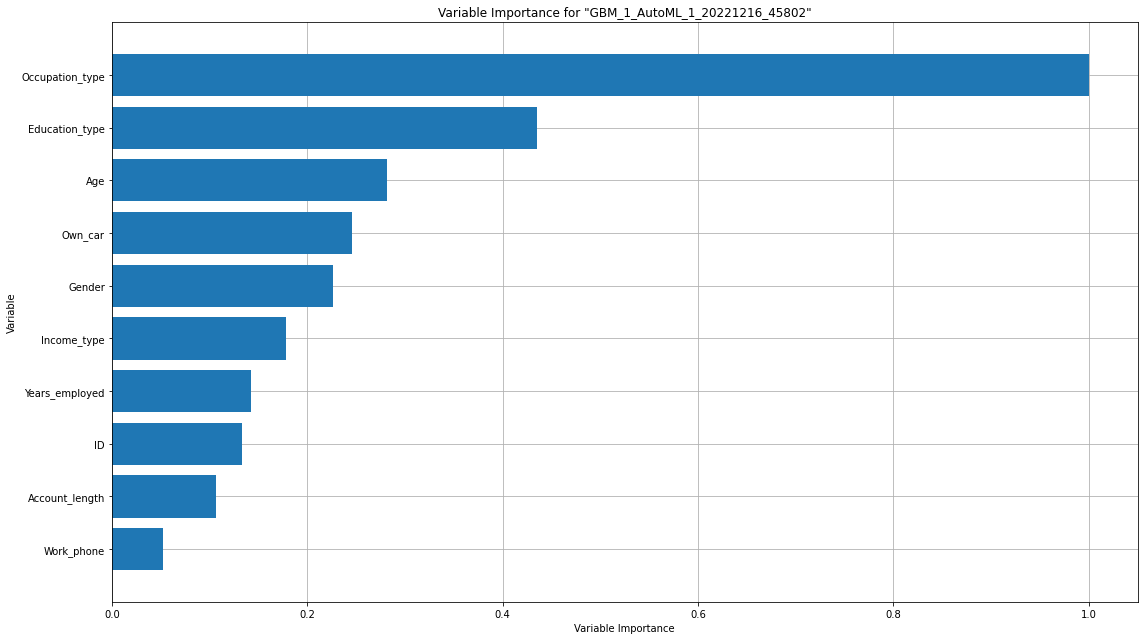

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

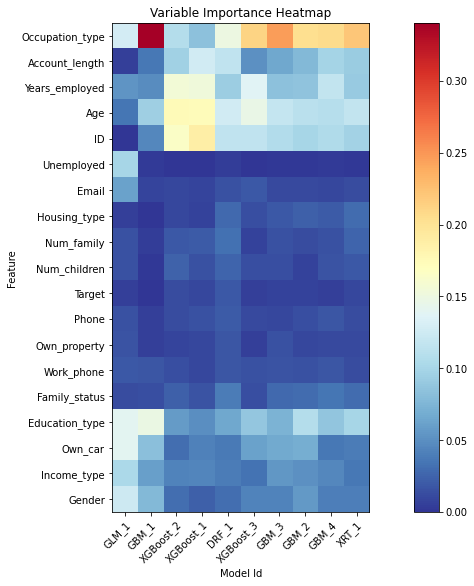

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

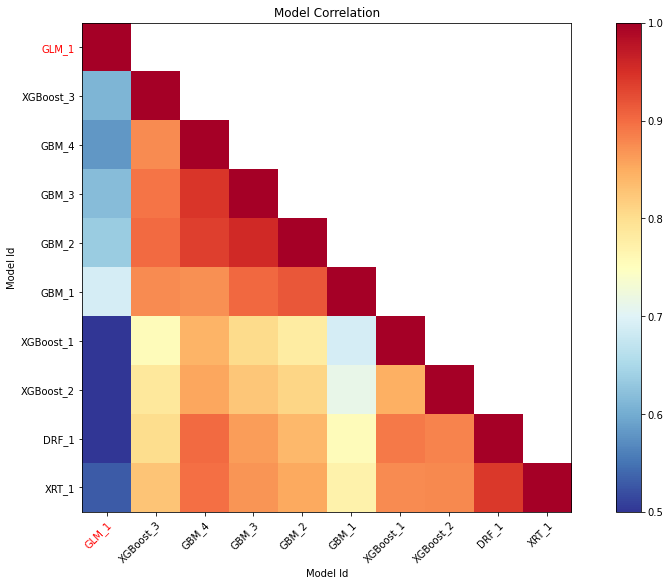

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

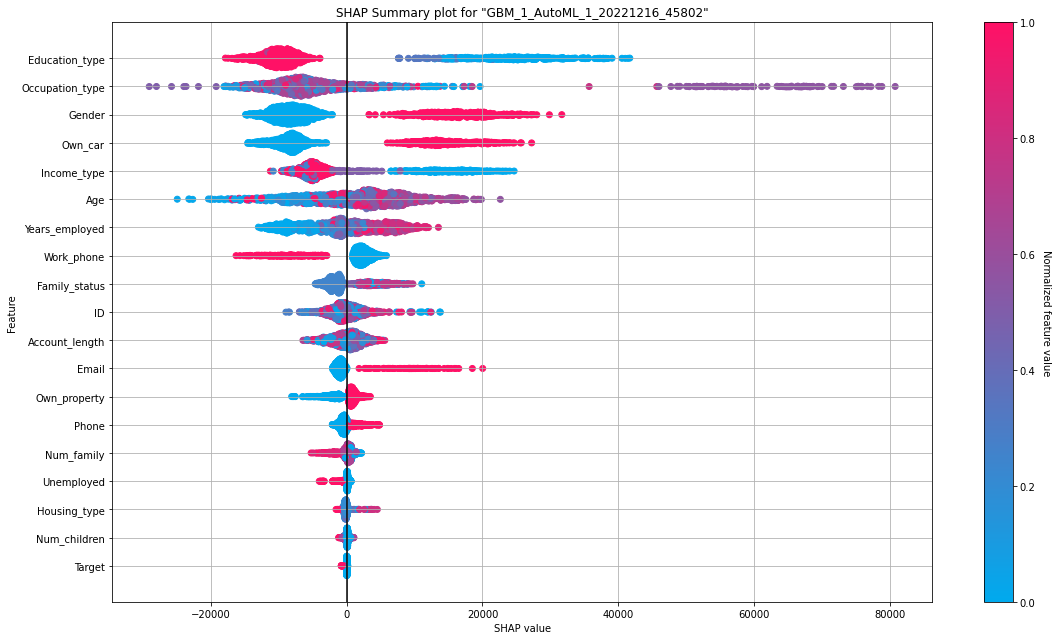

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

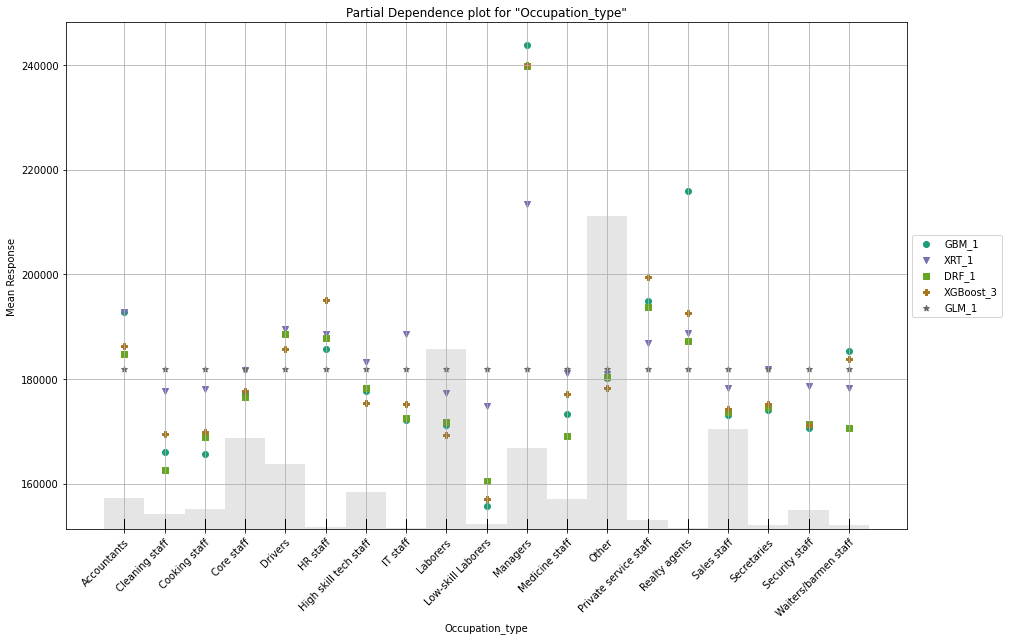

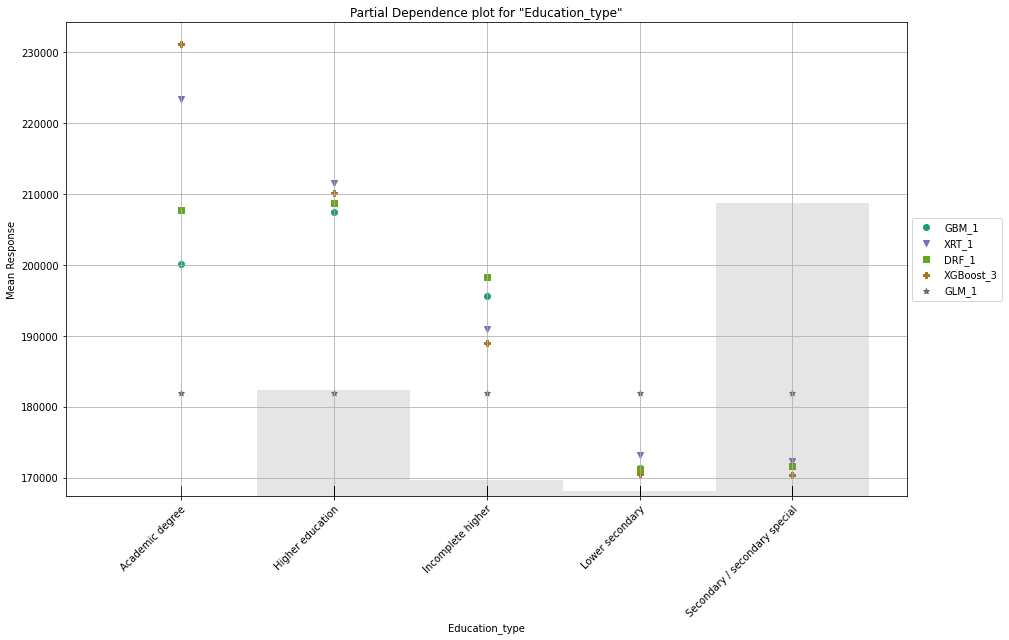

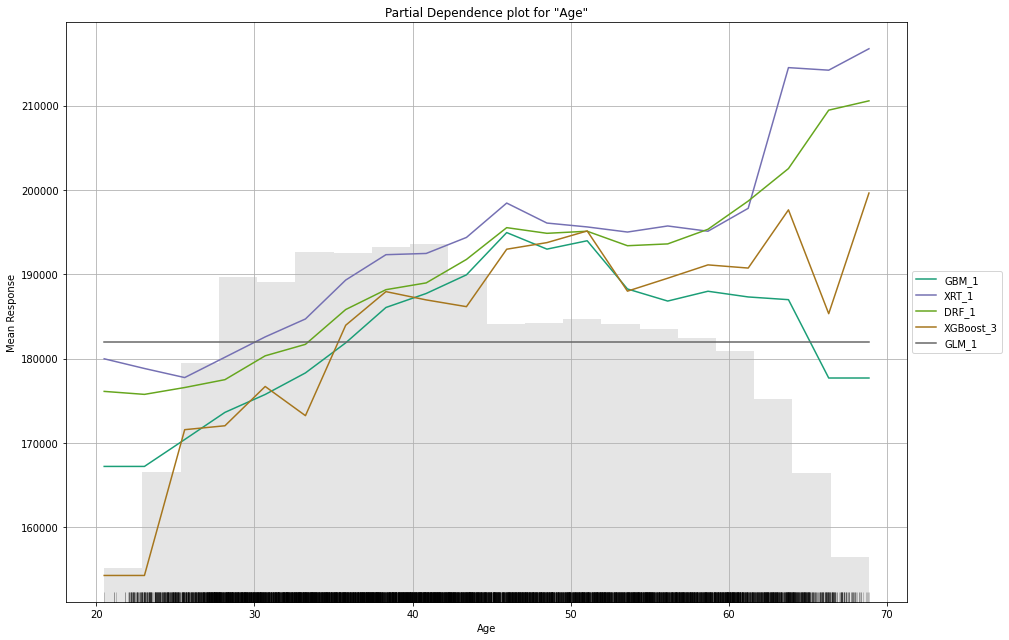

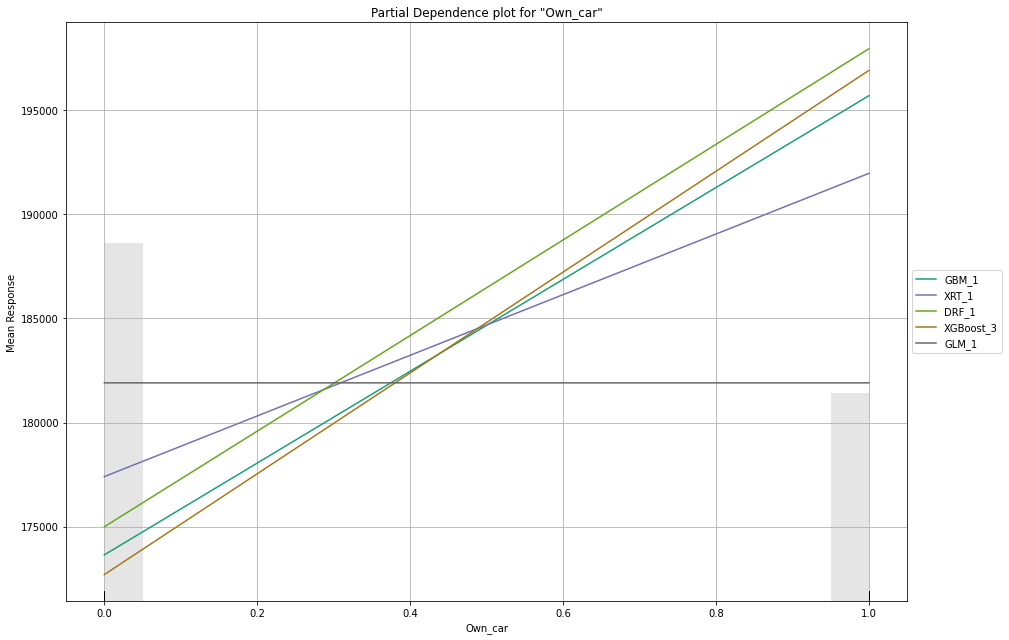

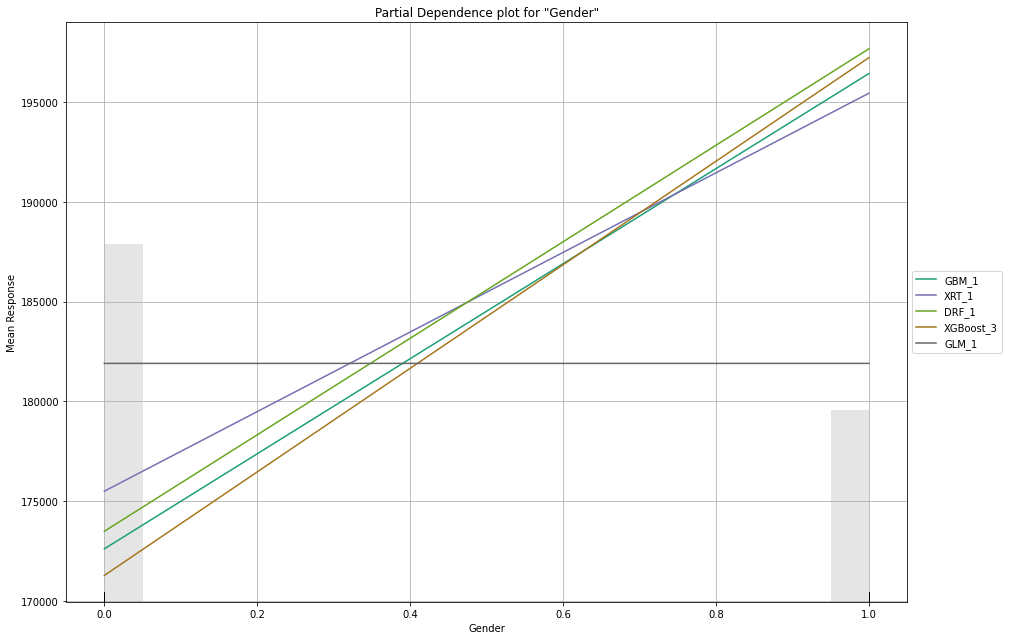

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

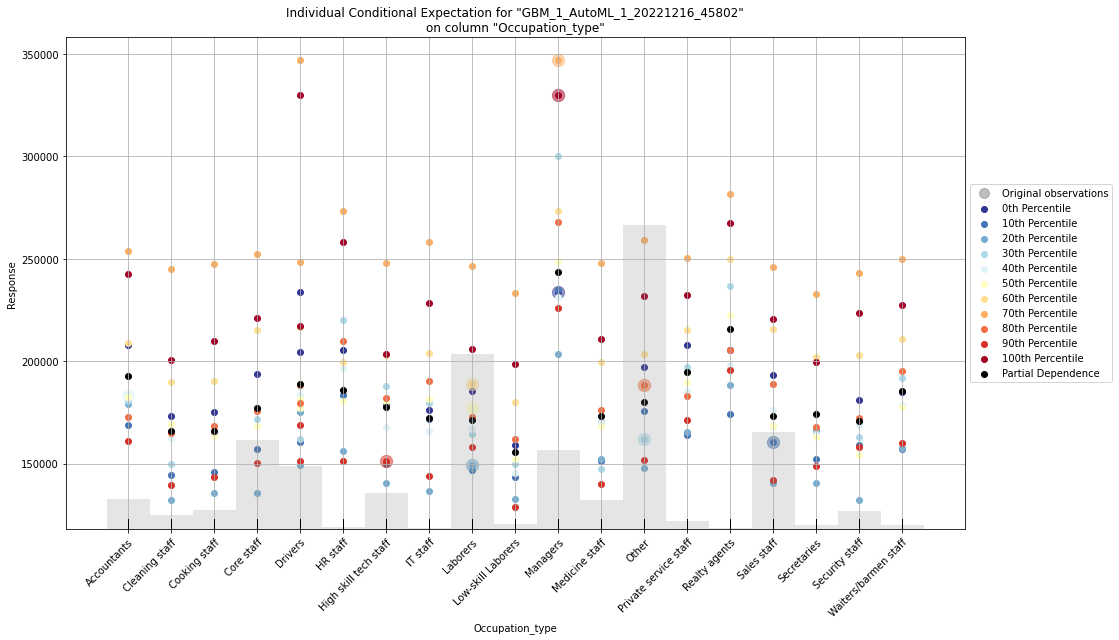

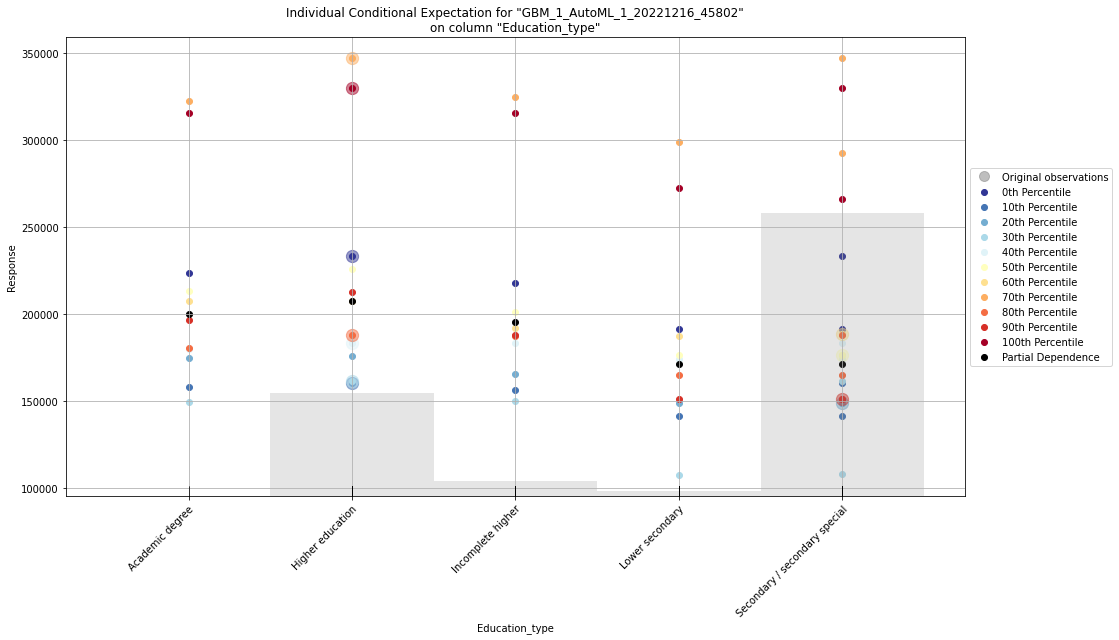

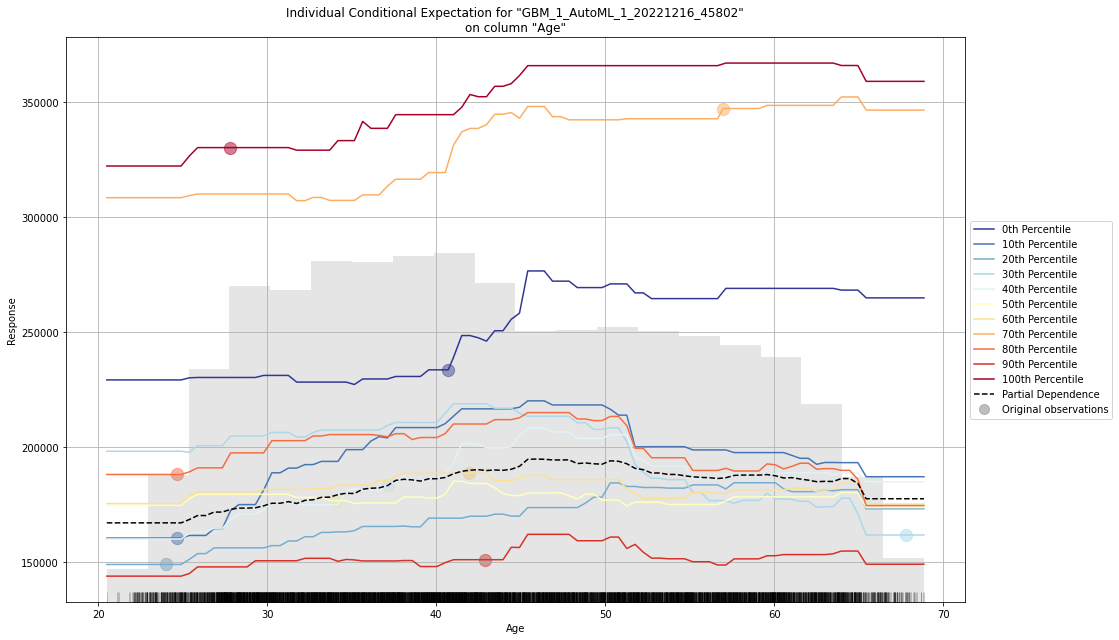

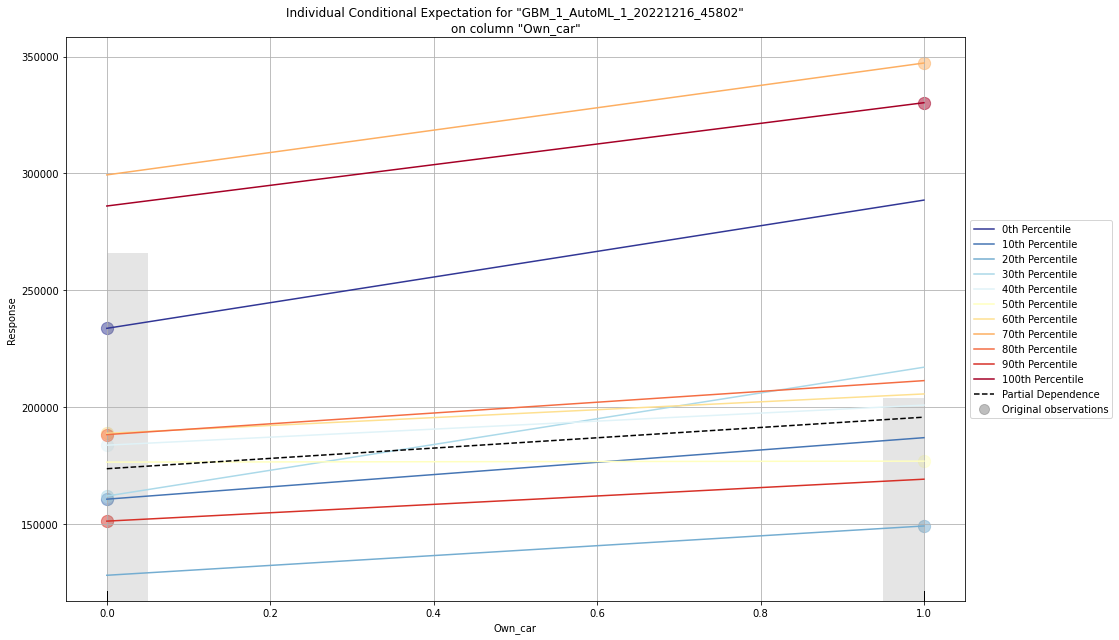

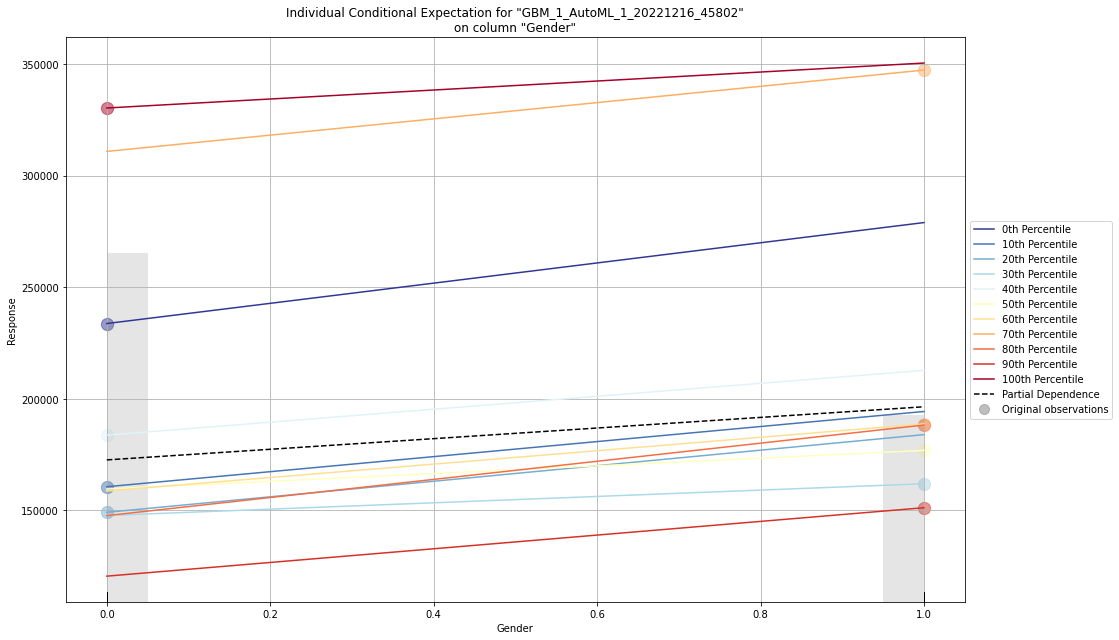

In [64]:
model_explain = aml2.explain(data2)

# OBSERVATION

* By looking and analysing the feature importance produced by all the three models used, Account_length can be determined as the most important feature to predict Target which is either 'high risk' if during any month they are late on payments by 30 days or more, and 'low risk' otherwise (Target Variable).

* SHAP values provide a way to compare the importance of a feature globally. The feature importance at a local level can also be compared using SHAP values. Additional advantages of SHAP include local accuracy and consistency.


# 3. HOW WELL DOES IT WORK?

* The accuracy of the model was 80% on both the training and testing datasets, and the error was calculated using the log loss approach, giving a result of 0.21. AutoML and SHAP studies were later performed. With loss, MSE, and R2 values as low as 0.17, 0.11, and 0.81 respectively, the AutoML leaderboard stacked ensemble model performed admirably. The most significant factor affecting the target variable was identified by SHAP analysis. The Best model interpreted by AutoML is "GBM" and there are 3 assumptions to validate which  are linearity, homoskedasticity (constant variance) and normality. <br>

* The model used does make sense. The log loss vlaues is very close to 0 and the AUC value is 1 which is the score a perfect classifier should help.

- For Linear Regression:
1. Accuracy = 0.8039421004003696

2. ROC Area under Curve = 0.8302

- For Random Forest:

1. Accuracy = 80.40622112719433

2. ROC Area under Curve  = 83.02

- For AutoML:

1. AUC: 0.94 


# 4. WHAT DID YOU LEARN?
I was able to determine the level of correlations between variables through this regression model-based assignment. Regression analysis involves the use of statistical metrics like R-squared and adjusted R-squared to determine how much of the total variability in the data is explained by your model. Moreover, I was able to determine which characteristics are good predictors of the target variable and which ones are not. This enabled me to deliver my findings in an illustrative and understandable way. Understanding how numbers from a model are produced and understood is crucial in the end.

# CONCLUSION 

After this assignment we can confidently say that SHAP is a great tool as it offers high interpretibility. As a solution to the difficulties of explaining machine learning, SHAP analysis can help engineers understand the effect of the inputs of the model and give further insights into the systems they are building, making it another valuable tool in the engineer’s toolbox

SHAP analysis can be applied to the data from any machine learning model. It gives an indication of the relationships that combine to create the model’s output and you can gain real insights into the relationships

By plotting various plots like summary plots, force plots, dependence plots for all the three models we got deeper insights about the data.

# REFERENCES

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb
4. Python Data Science Handbook
5. Sckit learn offcial documentation
6. mlxtend documentation
7. Analytics Vidhya 
8. https://towardsdatascience.com/explaining-scikit-learn-models-with-shap-61daff21b12a
9. https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b
10. https://www.datacamp.com/tutorial/decision-tree-classification-python
11. https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
12. https://www.kaggle.com/code/samuelcortinhas/credit-cards-data-cleaning

Copyright 2022 **Jatin Madan**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.